In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os

### Getting the benchmark data from the CREEDs gene expression files created in the 'GEO_download' R file

In [2]:
#Importing the single gene perturbation file I worked with in the 'genes_from_creeds_NN' code file
gene_perturb = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
gene_perturb.index = gene_perturb.index.astype(str)

In [3]:
fnames = os.listdir('../results/gene_perturb/')
fnames = [x[:-4] for x in fnames]
fnames = list(set(fnames) & set(gene_perturb.index))

In [4]:
gene_perturb = gene_perturb.loc[fnames]

In [5]:
gene_results = {}
for file_id in fnames:
    data = pd.read_csv('../results/gene_perturb/%s.csv' % (file_id), sep=',', header=0, index_col=0)
    data.index = pd.Series(data.index).str.upper().values
    data = data['t']
    gene_results[file_id] = data

In [6]:
all_genes = []
for file_id in fnames:
    all_genes += list(gene_results[file_id].index)
all_genes = list(set(all_genes))

In [7]:
#Creating the benchmark file
gene_resultsDF = pd.DataFrame(0.0, index = all_genes, columns=fnames)
for file_id  in fnames:
    gene_resultsDF.loc[gene_results[file_id].index, file_id] = gene_results[file_id]

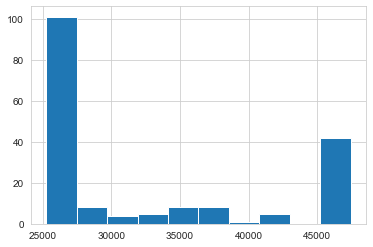

In [8]:
### nuber of zeros per experiments
(gene_resultsDF == 0).sum().hist()

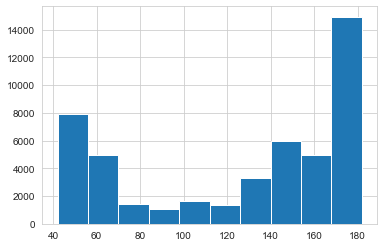

In [9]:
### number of zeros per genes
(gene_resultsDF == 0).sum(1).hist()

In [10]:
### filter bad experiments (with a lot of NaN)
fil = (gene_resultsDF == 0).sum(0) < 27500
good_experiments = gene_resultsDF.columns[fil]
gene_resultsDF = gene_resultsDF[good_experiments]

In [11]:
### filter bad genes (with a lot of NaN)
fil = (gene_resultsDF == 0).sum(1) == 0
gene_resultsDF = gene_resultsDF[fil]

In [12]:
### check overlap with lincs
lincs = pd.read_csv('../data/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                   sep='\t', header=0, index_col=0)
lincs = lincs[lincs['pr_is_lm']==1]

In [13]:
len(set(lincs['pr_gene_symbol']) & set(gene_resultsDF.index))

735

In [14]:
gene_resultsDF.shape

(11101, 101)

In [15]:
gene_resultsDF.to_csv('../results/gene_perturb_results.csv', sep=',')

### Getting the benchmark data from the CREEDs gene expression files created in the 'GEO_download' R file

In [16]:
drug_perturb = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
drug_perturb.index = drug_perturb.index.astype(str)

In [17]:
drug_perturb[drug_perturb['sign']!=0]

,cell_type,ctrl_ids,curator,drug_name,drugbank_id,geo_id,organism,pert_ids,platform,pubchem_cid,smiles,version,Target,Target_type,sign
105,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GABRA,agonist,1
106,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GRIN3A,antagonist,-1
107,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GLRA1,agonist,1
108,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GLRA2,agonist,1
153,NaN,GSM74493|GSM74494|GSM74495,Axel,Ethanol,DB00898,GSE3311,rat,GSM74496|GSM74497|GSM74498,GPL341,702.0,CCO,1.0,GABRA,agonist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,liver tissue,GSM159830|GSM159833|GSM159834|GSM159835,mmluxy,Sunitinib,DB01268,GSE6929,rat,GSM159831|GSM159832|GSM159837|GSM159838,GPL1355,5329102.0,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...,1.0,PDGFRA,antagonist,-1
1964,DRG neurons - 10 &Acirc;&micro;M for 30 min,GSM1442972|GSM1442973|GSM1442974|GSM1442975,cadimo,Capsaicin,NaN,GSE59727,rat,GSM1442976|GSM1442977|GSM1442978|GSM1442979,GPL6101,1548943.0,CC(C)C=CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC,1.0,TRPV1,agonist,1
1966,T47D breast cancer cells,GSM1649569|GSM1649573|GSM1649577,cadimo,Promegestone,NaN,GSE67561,human,GSM1649570|GSM1649574|GSM1649578,GPL10558,36709.0,CCC(=O)C1(CCC2C1(CCC3=C4CCC(=O)C=C4CCC23)C)C,1.0,PGR,agonist,1
1967,Skeletal muscles (of HIV-infected males),GSM113921|GSM115323|GSM115325|GSM115326|GSM115...,cadimo,Testosterone,DB00624,GSE5106,human,GSM115332|GSM115333|GSM115334|GSM115335|GSM115...,GPL571,6013.0,CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C,1.0,AR,agonist,1


In [18]:
fnames = os.listdir('../results/drug_perturb/')
fnames = [x[:-4] for x in fnames]
fnames = list(set(fnames) & set(drug_perturb.index))

In [19]:
len(fnames)

1958

In [20]:
drug_perturb = drug_perturb.loc[fnames]

In [21]:
drug_results = {}
for file_id in fnames:
    data = pd.read_csv('../results/drug_perturb/%s.csv' % (file_id), sep=',', header=0, index_col=0)
    data.index = pd.Series(data.index).str.upper().values
    data = data['t']
    drug_results[file_id] = data

In [22]:
all_genes = []
for file_id in fnames:
    all_genes += list(drug_results[file_id].index)
all_genes = list(set(all_genes))

In [23]:
drug_resultsDF = pd.DataFrame(0.0, index = all_genes, columns=fnames)
for file_id  in fnames:
    drug_resultsDF.loc[drug_results[file_id].index, file_id] = drug_results[file_id]

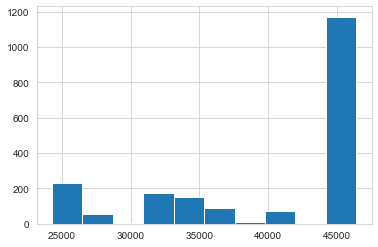

In [24]:
### nuber of zeros per experiments
(drug_resultsDF == 0).sum().hist()

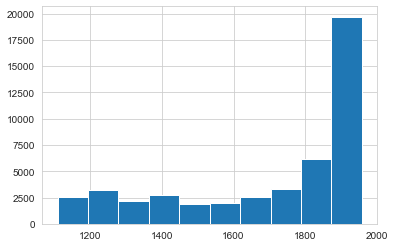

In [25]:
### nuber of zeros per genes
(drug_resultsDF == 0).sum(1).hist()

In [26]:
### filter bad experiments (with a lot of NaN)
fil = (drug_resultsDF == 0).sum(0) < 43000
good_experiments = drug_resultsDF.columns[fil]
drug_resultsDF = drug_resultsDF[good_experiments]

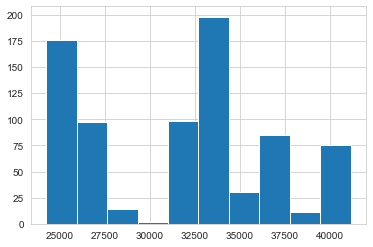

In [27]:
(drug_resultsDF == 0).sum().hist()

In [28]:
fil = (drug_resultsDF == 0).sum(0) < 32500
good_experiments = drug_resultsDF.columns[fil]
drug_resultsDF = drug_resultsDF[good_experiments]

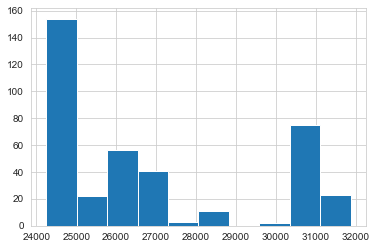

In [29]:
(drug_resultsDF == 0).sum().hist()

In [30]:
### filter bad genes (with a lot of NaN)
fil = (drug_resultsDF == 0).sum(1) == 0
drug_resultsDF = drug_resultsDF[fil]

In [31]:
### check overlap with lincs
lincs = pd.read_csv('../data/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                   sep='\t', header=0, index_col=0)
lincs = lincs[lincs['pr_is_lm']==1]

In [32]:
len(set(lincs['pr_gene_symbol']) & set(drug_resultsDF.index))

648

In [33]:
drug_resultsDF.shape

(7781, 387)

In [34]:
drug_resultsDF.to_csv('../results/drug_perturb_results.csv', sep=',')

In [35]:
drug_resultsDF

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
HSPD1,-0.977902,-0.495226,2.645156,-1.402658,-0.472635,1.171039,0.371829,-2.950343,-2.950343,-1.217178,...,-3.405230,-0.113964,-0.548385,-0.583012,-1.683659,-3.103644,-0.780401,0.519419,0.135799,-1.124970
C1QTNF6,-0.812820,-0.395383,1.038499,0.287884,-0.176610,-1.260067,3.139442,-0.123518,-0.123518,0.392044,...,-1.172718,0.917352,-2.947168,-1.801547,0.832710,8.257347,1.014694,-1.261224,-0.918467,0.279741
TANGO6,-1.347119,0.798411,-0.835500,-0.277805,0.355813,0.649659,1.018080,0.739773,0.739773,-0.549202,...,-0.833089,0.667091,-1.194884,-1.649035,0.997228,8.527643,-2.027916,0.580672,-0.747719,-0.688254
ACIN1,-0.741827,0.599398,0.202811,-0.213735,0.010692,-0.071792,8.024920,1.425588,1.425588,-0.907158,...,0.028910,-0.841475,-0.137936,0.145820,0.198583,-7.185948,0.495708,0.044030,-0.002079,-0.186203
EBAG9,-0.267233,0.962713,0.970027,-0.092120,0.546296,-1.401199,-0.947189,1.786996,1.786996,0.502146,...,0.233708,0.172293,-0.873505,0.487397,-1.622473,1.689068,-3.106171,-1.549363,-0.570498,-0.181124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COMP,0.113174,-2.297470,-0.546279,0.372331,1.337586,1.534462,1.049377,1.438318,1.438318,-1.617112,...,0.067918,0.393438,1.387687,4.341017,0.391137,0.403279,-0.911899,0.282464,-0.993456,0.075333
POMC,0.083734,-1.283736,-1.522173,0.261264,-0.758168,0.536297,2.166779,0.725726,0.725726,-1.466509,...,-1.392520,1.390610,1.653663,0.438332,0.791268,-2.357944,-0.200029,-0.490870,2.203952,0.846940
TRA2B,-0.146213,0.959273,1.539276,-1.177394,0.361115,3.059752,-1.805891,-0.648172,-0.648172,-0.533938,...,-2.727863,-0.351405,0.959477,0.230524,-0.731791,-0.517571,-2.967414,0.674418,0.791235,-0.437711
PTPA,0.059637,-1.174207,0.667468,-0.423984,-0.217675,-0.183868,2.669919,-0.496450,-0.496450,-1.004140,...,1.819967,2.456579,-0.692096,1.868919,-1.169484,-3.201584,1.609274,0.565937,0.163621,0.627112
